In [6]:
import datacube
import matplotlib.pyplot as plt

product_name = 'bh_aerial_image_1999'

query = {
    'latitude': ( -19.90, -19.905),
    'longitude': ( -43.93, -43.933),
}


In [7]:
dc = datacube.Datacube()
dc.index.products.get_by_name(product_name)


product_info = dc.index.products.get_by_name(product_name)

resolution = product_info.definition['storage']['resolution']
crs = product_info.definition['storage']['crs']


In [8]:


dc = datacube.Datacube()
dc.index.products.get_by_name(product_name)


ds = dc.load(product=product_name, output_crs=crs, resolution=(resolution['x'],resolution['y']), **query)

print(ds)


<xarray.Dataset>
Dimensions:      (time: 1, x: 795, y: 1390)
Coordinates:
  * time         (time) datetime64[ns] 2002-07-02
  * y            (y) float64 7.799e+06 7.799e+06 ... 7.799e+06 7.799e+06
  * x            (x) float64 6.12e+05 6.12e+05 6.12e+05 ... 6.117e+05 6.117e+05
    spatial_ref  int32 29193
Data variables:
    red          (time, y, x) uint8 51 44 41 43 49 64 90 ... 77 80 82 83 79 76
    green        (time, y, x) uint8 69 67 66 69 72 83 105 ... 85 85 87 86 82 77
    blue         (time, y, x) uint8 55 49 45 44 44 55 76 ... 88 91 93 93 87 82
Attributes:
    crs:           EPSG:29193
    grid_mapping:  spatial_ref


['2002-07-02T00:00:00.000000000']


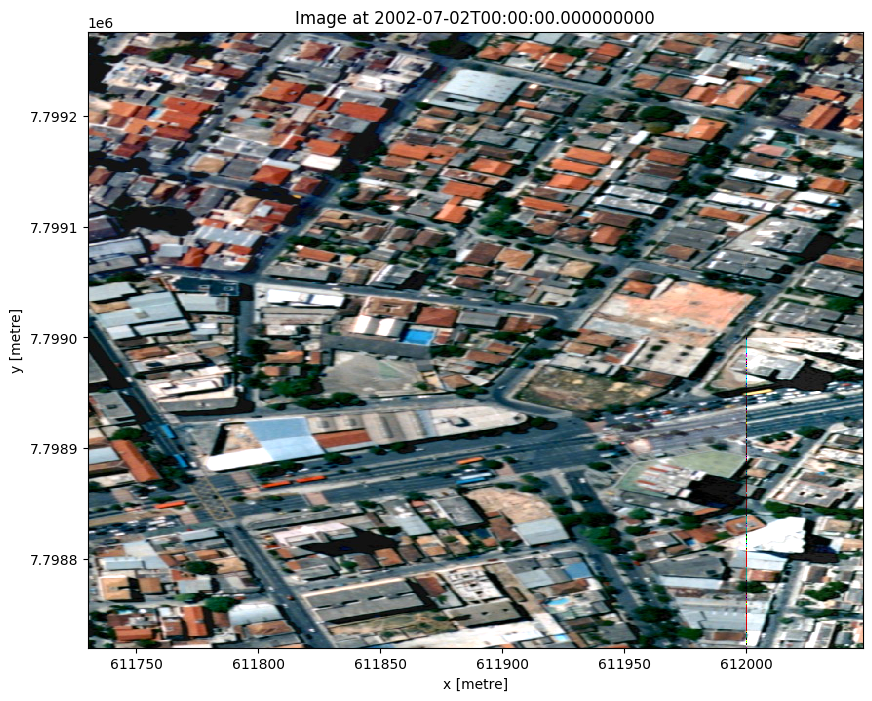

In [9]:
# Selecione as bandas desejadas
all_bands = ds.data_vars

available_times = ds.time.values
print(available_times)

# Especifique o tempo desejado (por exemplo, o primeiro tempo no conjunto de dados)
time_index = 0


selected_data = ds.isel(time=time_index).to_array().transpose('y', 'x', 'variable')



# Aumente o tamanho do plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))  # Ajuste os valores de largura e altura conforme necessário

# Plote a imagem com todas as bandas (ajuste conforme necessário)
# Nota: A visualização pode precisar ser ajustada dependendo do número e tipo de bandas
selected_data.plot.imshow(robust=True)
plt.title(f'Image at {ds["time"].values[time_index]}')
plt.show()


In [10]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Defina a URL da requisição WMS
wms_url = "http://localhost:8000/wms?service=WMS&version=1.3.0&request=GetMap&layers=bh_aerial_image_1999&crs=EPSG:29193&bbox=-43.933,-19.905,-43.93,-19.90&width=400&height=400&format=image/png"

# Faça a requisição WMS
response = requests.get(wms_url)

# Verifique se a requisição foi bem-sucedida
if response.status_code == 200:
    # Carrega a imagem a partir dos dados recebidos
    image = Image.open(BytesIO(response.content))
    
    # Exibe a imagem
    plt.imshow(image)
    plt.axis('off')  # Desativa os eixos do gráfico
    plt.show()
else:
    print("Falha na requisição:", response.status_code)


ConnectionError: HTTPConnectionPool(host='localhost', port=8000): Max retries exceeded with url: /wms?service=WMS&version=1.3.0&request=GetMap&layers=bh_aerial_image_1999&crs=EPSG:29193&bbox=-43.933,-19.905,-43.93,-19.90&width=400&height=400&format=image/png (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f4f8c7bd330>: Failed to establish a new connection: [Errno 111] Connection refused'))